In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw
import multiprocessing
from multiprocessing import Pool

from uniform_clicks import compute_energy, test_gamma


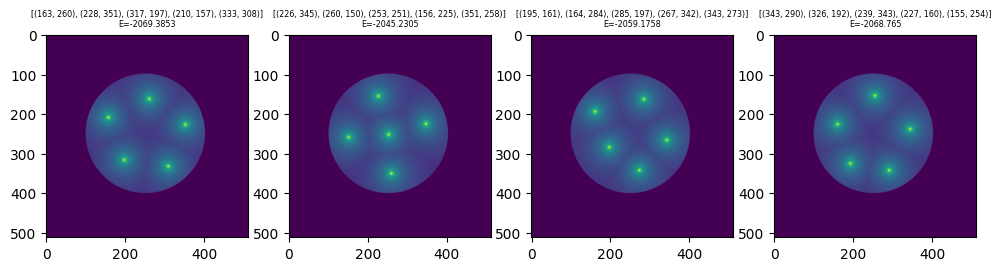

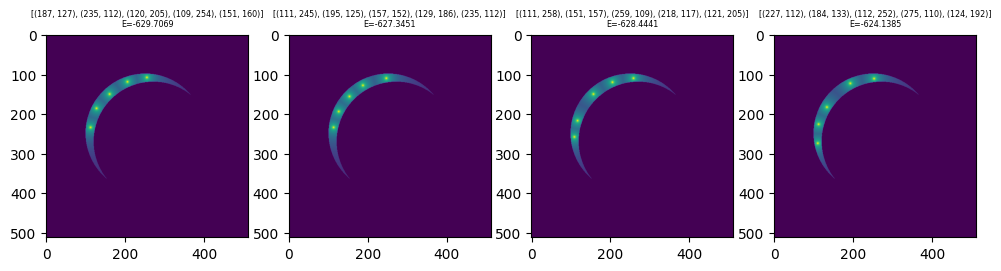

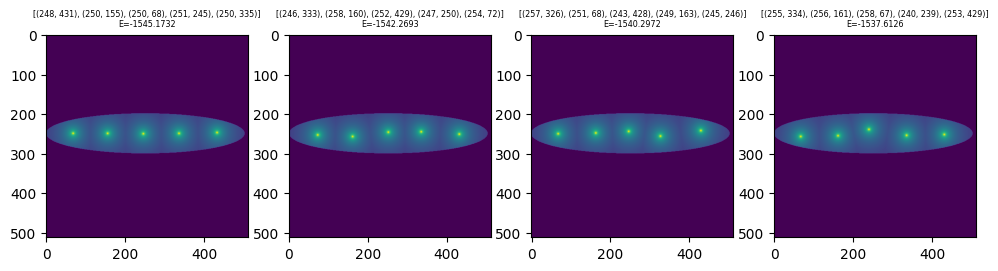

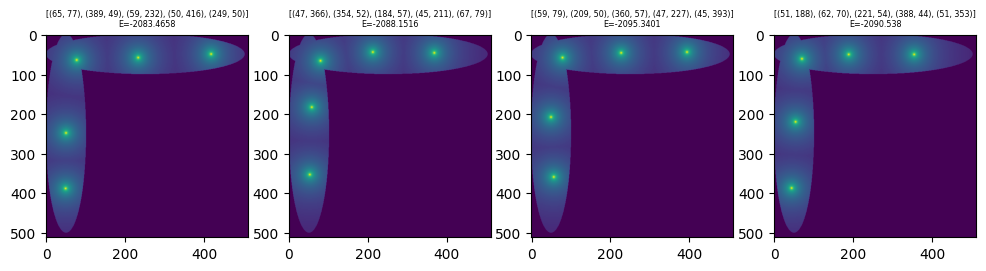

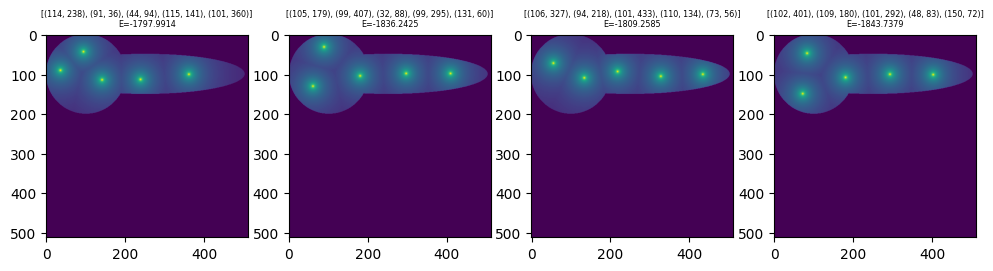

In [2]:
def show_energy(frame_array, workers_output):
    fig, ax = plt.subplots(nrows=1, ncols=len(workers_output), figsize=(12, 3.8))
    for i in range(len(workers_output)):
        w = workers_output[i]
        ax[i].set_title(str(w[0]) + "\n" + "E=" + str(round(w[1], ndigits=4)), fontsize="xx-small")
        energy = compute_energy(w[0], frame_array)
        ax[i].imshow(np.log10(energy + 0.01))
    plt.show();

n_points = 5
anneal_schedule = {"tmax": 2000.0, "tmin": 0.1, "steps": 100 * n_points, "updates": 0}

if __name__ == "__main__":
    n_cpus = multiprocessing.cpu_count()
    try:
        multiprocessing.set_start_method("spawn")
    except RuntimeError:
        pass
    p = Pool(processes=n_cpus)

    n_trials = 4

    frame = Image.new(mode="L", size=(512, 512), color=(0))
    draw = ImageDraw.Draw(frame)
    draw.ellipse([(100, 100), (400, 400)], fill=1, outline=1)
    # draw.ellipse([(120, 120), (420, 420)], fill=0, outline=0)
    frame_arr1 = np.array(frame, dtype=np.uint8)
    arglist = list(
        zip([frame_arr1] * n_trials, [anneal_schedule] * n_trials, [n_points] * n_trials)
    )
    work_out1 = p.map(test_gamma, arglist)
    del frame
    show_energy(frame_arr1, work_out1)


    frame = Image.new(mode="L", size=(512, 512), color=(0))
    draw = ImageDraw.Draw(frame)
    draw.ellipse([(100, 100), (400, 400)], fill=1, outline=1)
    draw.ellipse([(120, 120), (420, 420)], fill=0, outline=0)
    frame_arr2 = np.array(frame, dtype=np.uint8)
    arglist = list(
        zip([frame_arr2] * n_trials, [anneal_schedule] * n_trials, [n_points] * n_trials)
    )
    work_out2 = p.map(test_gamma, arglist)
    del frame
    show_energy(frame_arr2, work_out2)

    frame = Image.new(mode="L", size=(512, 512), color=(0))
    draw = ImageDraw.Draw(frame)
    draw.ellipse([(0, 200), (500, 300)], fill=1, outline=1)
    frame_arr3 = np.array(frame, dtype=np.uint8)
    arglist = list(
        zip([frame_arr3] * n_trials, [anneal_schedule] * n_trials, [n_points] * n_trials)
    )
    work_out3 = p.map(test_gamma, arglist)
    del frame
    show_energy(frame_arr3, work_out3)

    frame = Image.new(mode="L", size=(512, 512), color=(0))
    draw = ImageDraw.Draw(frame)
    draw.ellipse([(0, 0), (500, 100)], fill=1, outline=1)
    draw.ellipse([(0, 0), (100, 500)], fill=1, outline=1)
    frame_arr4 = np.array(frame, dtype=np.uint8)
    arglist = list(
        zip([frame_arr4] * n_trials, [anneal_schedule] * n_trials, [n_points] * n_trials)
    )
    work_out4 = p.map(test_gamma, arglist)
    del frame
    show_energy(frame_arr4, work_out4)

    frame = Image.new(mode="L", size=(512, 512), color=(0))
    draw = ImageDraw.Draw(frame)
    draw.ellipse([(0, 0), (200, 200)], fill=1, outline=1)
    draw.ellipse([(0, 50), (500, 150)], fill=1, outline=1)
    frame_arr5 = np.array(frame, dtype=np.uint8)
    arglist = list(
        zip([frame_arr5] * n_trials, [anneal_schedule] * n_trials, [n_points] * n_trials)
    )
    work_out5 = p.map(test_gamma, arglist)
    del frame
    show_energy(frame_arr5, work_out5)

    p.close()
